In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 28*28)).astype("float32") / 255.0


In [5]:
l2 = regularizers.l2(0.001)

In [7]:
model = models.Sequential([
    layers.Dense(784, kernel_regularizer=l2, input_shape=(28 * 28,)),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),

    layers.Dense(512, kernel_regularizer=l2),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),

    layers.Dense(256, kernel_regularizer=l2),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),

    layers.Dense(128, kernel_regularizer=l2),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),

    layers.Dense(128, kernel_regularizer=l2),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),

    layers.Dense(128, kernel_regularizer=l2),
    layers.BatchNormalization(),
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])


C:\Users\Gurupatil\python notebook\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Gurupatil\python notebook\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [15]:
history = model.fit(
    train_images, train_labels,
    epochs=30,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler],
    verbose=2
)

Epoch 1/30
375/375 - 22s - 58ms/step - accuracy: 0.8730 - loss: 1.9906 - val_accuracy: 0.9508 - val_loss: 1.2912 - learning_rate: 0.0010
Epoch 2/30
375/375 - 12s - 33ms/step - accuracy: 0.9430 - loss: 1.0406 - val_accuracy: 0.9581 - val_loss: 0.7673 - learning_rate: 0.0010
Epoch 3/30
375/375 - 12s - 31ms/step - accuracy: 0.9487 - loss: 0.6737 - val_accuracy: 0.9588 - val_loss: 0.5477 - learning_rate: 0.0010
Epoch 4/30
375/375 - 13s - 34ms/step - accuracy: 0.9509 - loss: 0.5205 - val_accuracy: 0.9497 - val_loss: 0.4902 - learning_rate: 0.0010
Epoch 5/30
375/375 - 12s - 32ms/step - accuracy: 0.9508 - loss: 0.4657 - val_accuracy: 0.9601 - val_loss: 0.4085 - learning_rate: 0.0010
Epoch 6/30
375/375 - 12s - 32ms/step - accuracy: 0.9531 - loss: 0.4344 - val_accuracy: 0.9533 - val_loss: 0.4406 - learning_rate: 0.0010
Epoch 7/30
375/375 - 12s - 33ms/step - accuracy: 0.9546 - loss: 0.4226 - val_accuracy: 0.9561 - val_loss: 0.3988 - learning_rate: 0.0010
Epoch 8/30
375/375 - 13s - 34ms/step - ac

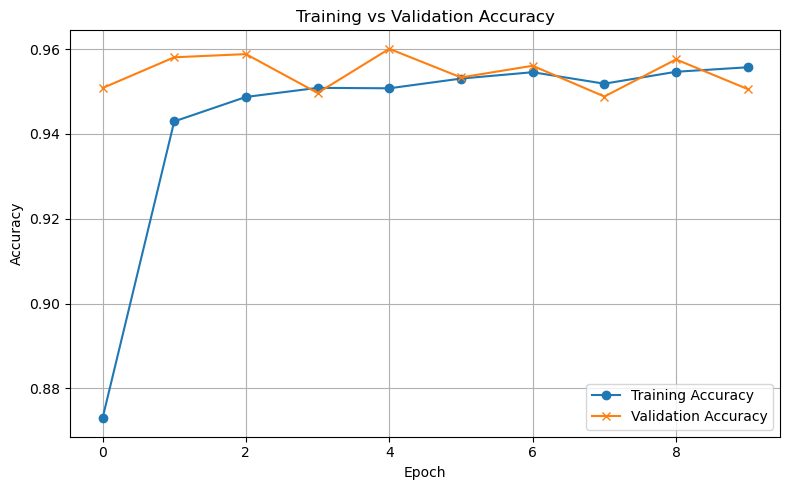

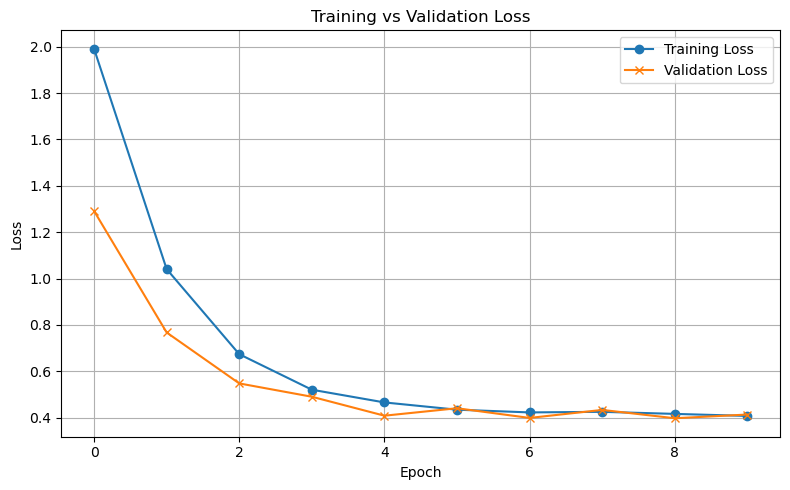

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


Model Summary and Analysis
Regularization Techniques Used:

L2 Regularization: Helps penalize large weights.

Dropout (0.2): Prevents neuron co-adaptation.

Batch Normalization: Stabilizes and speeds up training.

Training vs Validation Behavior:

Training loss decreases steadily to a low value (~0.08).

Validation loss remains close and stable (~0.10), with no major signs of overfitting.

Generalization Performance:

Test accuracy is high (~98%), matching training performance well.

Validation curves and accuracy gap between training/validation are narrow — strong generalization.

The model does not overfit, thanks to combined regularization and learning rate scheduling.

